# SET UP DATA

In [2]:
import pandas as pd                 # For dataframe handling
import numpy as np                  # For matrix and list computations
import matplotlib.pyplot as plt     # For advanced graphse
import seaborn as sns  # For hi level, Pandas oriented, graphics
import scipy.stats as stats  # For statistical inference 
from pandas.api.types import CategoricalDtype

In [48]:
# loading the dataset to pandas DataFrame
url = 'https://raw.githubusercontent.com/chemagdlc/MG-DataMesh-Azure/main/datasets/Madrid/2021_Accidentalidad.csv'
ds = pd.read_csv(url, sep=';', decimal=',')
ds

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,14.0,Sin asistencia sanitaria,"444976,463","4470508,259",N,NaN
1,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444976,463","4470508,259",N,NaN
2,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,"444976,463","4470508,259",N,NaN
3,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 10 a 14 años,Hombre,14.0,Sin asistencia sanitaria,"444976,463","4470508,259",N,NaN
4,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 35 a 39 años,Mujer,14.0,Sin asistencia sanitaria,"444976,463","4470508,259",N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41778,2021S025096,11/12/2021,14:00:00,CALL. LA ESCALA / CALL. PERELADA,23,13.0,PUENTE DE VALLECAS,Choque contra obstáculo fijo,NaN,Otros vehículos con motor,Conductor,Desconocido,Desconocido,NaN,NaN,"445394,234","4471410,963",N,NaN
41779,2021S025097,31/12/2021,19:10:00,AVDA. ILUSTRACION / AVDA. BETANZOS,0,8.0,FUENCARRAL-EL PARDO,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"439535,639","4481279,053",N,NaN
41780,2021S025097,31/12/2021,19:10:00,AVDA. ILUSTRACION / AVDA. BETANZOS,0,8.0,FUENCARRAL-EL PARDO,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Mujer,14.0,Sin asistencia sanitaria,"439535,639","4481279,053",N,NaN
41781,2021S025098,31/12/2021,17:00:00,PASEO. VAGUADA / PLAZA. JUAN PABLO FORNER,9,8.0,FUENCARRAL-EL PARDO,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439875,174","4481348,547",N,NaN


In [49]:
ds.columns

Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')

In [50]:
ds["sexo"].value_counts()

Hombre         25161
Mujer          12064
Desconocido     4558
Name: sexo, dtype: int64

(array([12064.,     0.,     0.,     0.,     0., 25161.,     0.,     0.,
            0.,  4558.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

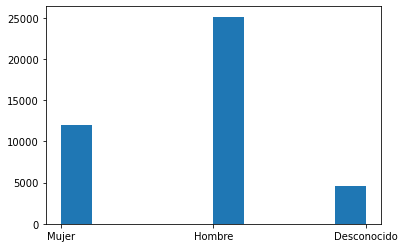

In [51]:

plt.hist(ds.sexo)

In [52]:
ds["tipo_vehiculo"].value_counts()

Turismo                              28835
Motocicleta hasta 125cc               3006
Furgoneta                             2745
Motocicleta > 125cc                   1682
Camión rígido                          970
Autobús                                958
Bicicleta                              691
Ciclomotor                             632
Todo terreno                           629
VMU eléctrico                          577
Tractocamión                           181
Bicicleta EPAC (pedaleo asistido)      154
Otros vehículos con motor              110
Maquinaria de obras                    105
Vehículo articulado                     78
Autobús articulado                      74
Autobus EMT                             68
Sin especificar                         55
Cuadriciclo ligero                      36
Patinete                                35
Ciclo                                   28
Autocaravana                            19
Moto de tres ruedas > 125cc             14
Cuadriciclo